## Load some Modules

In [3]:
######################
#import useful modules
######################

import os,sys
#for netcdf files
from netCDF4 import Dataset
import numpy as np

#for plotting
import matplotlib.pyplot as plt

#for 3D plotting
from mayavi import mlab
#mlab.options.offscreen = True

%matplotlib inline

********************************************************************************
         to build the TVTK classes (6.3). This may cause problems.
         Please rebuild TVTK.
********************************************************************************



## Basic mlab examples

In [4]:
##################################
# Basic Example to test mlab.surf
##################################

mlab.clf()
x, y = np.mgrid[-10:10:100j, -10:10:100j]
r = np.sqrt(x**2 + y**2)
z = np.sin(r)/r

# create surface
mlab.surf(z, warp_scale='auto')
#mlab.savefig('surf_test.png',magnification='auto'); mlab.close()
mlab.show()

/Users/gula/miniconda2/lib/python2.7/site-packages/tvtk/array_handler.py:268: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
Exception occurred in traits notification handler for object: <mayavi.sources.array_source.ArraySource object at 0x12e7a7f50>, trait: scalar_data, old value: None, new value: [[0.07070981 0.07075774 0.06938729 ... 0.06938729 0.07075774 0.07070981]
 [0.07075774 0.06934346 0.06649457 ... 0.06649457 0.06934346 0.07075774]
 [0.06938729 0.06649457 0.06217951 ... 0.06217951 0.06649457 0.06938729]
 ...
 [0.06938729 0.06649457 0.06217951 ... 0.06217951 0.06649457 0.06938729]
 [0.07075774 0.06934346 0.06649457 ... 0.06649457 0.06934346 0.07075774]
 [0.07070981 0.07075774 0.06938729 ... 0.06938729 0.07075774 0.07070981]]
Traceback (most recent call last):
  File "/Users/gula/mini

Exception occurred in traits notification handler.
Please check the log file for details.


In [ ]:
##################################
# Basic Example to test mlab.mesh
##################################

mlab.clf()
phi, theta = np.mgrid[0:np.pi:11j, 0:2*np.pi:11j]
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)
mlab.mesh(x, y, z)
mlab.mesh(x, y, z, representation='wireframe', color=(0, 0, 0))
mlab.show()

# Example using croco data

## 1. Load some topography data

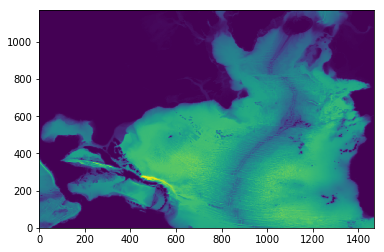

In [17]:
############################
#Load data from a CROCO file
############################

grd_name = '/net/libra/local/tmp/1/gula/ROMS/Simulations/MEGATL/MEGATL6/megatl6_grd_v2.nc'
grd = Dataset(grd_name)

topo = grd.variables['h'][:]
lon = grd.variables['lon_rho'][:]
lat = grd.variables['lat_rho'][:]

grd.close()

################
#Plot topography
################

plt.pcolormesh(topo)

## 2. Plot topography using mlab.surf

In [4]:
# create a figure
mlab.figure(bgcolor=(1, 1, 1), size=(1200, 800))

# create surface
surf=mlab.surf(-topo, warp_scale=0.05,colormap='gist_earth')

# push updates to the figure
mlab.view(-81.11558499779234, 45.72131562132714, 2531.6794205255146, np.array([  -0.5,   -0.5, -200.5]))
mlab.draw()

#mlab.savefig('surf_atl.png',magnification='auto'); mlab.close()
mlab.show()

/home/gula/.virtualenvs/mayavi/local/lib/python2.7/site-packages/mayavi/tools/camera.py:288: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if focalpoint is not None and not focalpoint == 'auto':


## 3. Plot Atlantic topography using mlab.mesh

In [20]:
# create a figure
mlab.figure(1, bgcolor=(1, 1, 1), fgcolor=(0, 0, 0), size=(1200, 800))

# create mesh (with non-orthogonal grid)
mesh = mlab.mesh(lon,lat,-2*topo/(40000./abs(np.max(lon)-np.min(lon))), scalars=-topo,colormap='gist_earth')

mlab.view(-69.48022045072746, 35.63586875228213, 173.57521057302216, np.array([-53.4266243 ,  33.95706475, -13.94244397]))
mlab.draw()
#mlab.savefig('mesh_atl.png',magnification='auto'); mlab.close()
mlab.show()

## 4. Plot topography + SST/SSH using mlab.mesh

In [5]:
# compute a variable
#temp = var('temp',simul,depths=[0]).data
#zeta = var('zeta',simul,depths=[0]).data

nc_name = '/net/libra/local/tmp/1/gula/ROMS/Simulations/MEGATL/MEGATL6/MEGATL6_N50_CLIM_newgrd_kpp/megatl6_his.00190.nc'
nc = Dataset(nc_name)
zeta = nc.variables['zeta'][0,:,:]
temp = nc.variables['temp'][0,-1,:,:]
nc.close()


# create a figure
mlab.figure(1, bgcolor=(1, 1, 1), fgcolor=(0, 0, 0), size=(1200, 800))
my_cmap='jaisnc'

# create mesh (with non-orthogonal grid)
mesh = mlab.mesh(lon,lat,-1*topo/(40000./abs(np.max(lon)-np.min(lon))), scalars=-topo,colormap='gist_earth')
mesh_temp = mlab.mesh(lon,lat,zeta*2, scalars=temp,opacity=0.5)

#mesh_temp.module_manager.scalar_lut_manager.lut.table = nc_colormap_for_mlab(my_cmap)
mlab.view(-69.48022045072746, 35.63586875228213, 173.57521057302216, np.array([-53.4266243 ,  33.95706475, -13.94244397]))

mlab.draw()
mlab.show()


IOError: [Errno 2] No such file or directory: '/net/libra/local/tmp/1/gula/ROMS/Simulations/MEGATL/MEGATL6/MEGATL6_N50_CLIM_newgrd_kpp/megatl6_his.00190.nc'

## 5. Plot 3d scalar variables using pipeline


In [12]:
############################
#Load data from a CROCO file
############################

[x1,x2,y1,y2]=[0,1000,0,1000]

#Load Temperature in 3D
nc_name = '/net/libra/local/tmp/1/gula/ROMS/Simulations/MEGATL/MEGATL6/MEGATL6_N50_CLIM_newgrd_kpp/megatl6_his.00190.nc'
nc = Dataset(nc_name)
var = nc.variables['temp'][0,:,y1:y2,x1:x2]
nc.close()

#Load Mask and topo
grd_name = '/net/libra/local/tmp/1/gula/ROMS/Simulations/MEGATL/MEGATL6/megatl6_grd_v2.nc'
grd = Dataset(grd_name)

mask = grd.variables['mask_rho'][y1:y2,x1:x2]
topo = grd.variables['h'][y1:y2,x1:x2]
lon = grd.variables['lon_rho'][y1:y2,x1:x2]
lat = grd.variables['lat_rho'][y1:y2,x1:x2]

grd.close()

In [13]:
##########################################
# Put 2d data in 3d arrays (with z levels)
##########################################

def getvarxyz(var):
    zi,yi,xi=np.mgrid[0:var.shape[0],0:var.shape[1],0:var.shape[2]]
    zi=1.*zi/var.shape[0]; xi=1.*xi/var.shape[2]; yi=1.*yi/var.shape[1];
    varmin=np.nanmin(var)+(np.nanmax(var)-np.nanmin(var))/10
    varmax=np.nanmax(var)-(np.nanmax(var)-np.nanmin(var))/10
    return [zi,yi,xi,varmin,varmax]

#############

depths = range(-6000,50,50)
coef=0.5

############# make 3d arrays

[zi,yi,xi,varmin,varmax] = getvarxyz(var)

topoz = var*np.nan
for iz in range(topoz.shape[0]):
    topoz[iz,:,:]= (topo + depths[iz] - 10.)*mask



In [15]:
##########
#Plot data
##########


mlab.figure(1, bgcolor=(1, 1, 1), fgcolor=(0, 0, 0), size=(800, 600))

#Plot the Gulf Steam topo
src3 = mlab.pipeline.scalar_field(zi,yi,xi,topoz)
src3.spacing = [1.,1.0,1.]
varmin,varmax = 0,0.1
mlab.pipeline.iso_surface(src3, contours=[0.], colormap='Greys',opacity=1., vmin=varmin,vmax=varmax)

#Plot vertical fluxes of vorticity
src = mlab.pipeline.scalar_field(zi,yi,xi,var)
src.spacing = [1.,1.,1.]
varmin,varmax = 10.,25.
mlab.pipeline.iso_surface(src, contours=[varmin*0.75,varmax*0.75], colormap='RdYlBu',opacity=0.4, vmin=varmin,vmax=varmax)

mlab.show()

Exception occurred in traits notification handler for object: <mayavi.sources.array_source.ArraySource object at 0x138061350>, trait: scalar_data, old value: None, new value: [[[   -0.         -0.         -0.      ... -1826.2041  -1831.4774
   -1835.4686 ]
  [   -0.         -0.         -0.      ... -1826.2041  -1831.4774
   -1835.4686 ]
  [   -0.         -0.         -0.      ... -1966.884   -1988.3232
   -2007.2914 ]
  ...
  [   -0.         -0.         -0.      ... -3233.5837  -3210.2502
   -3186.1248 ]
  [   -0.         -0.         -0.      ... -3242.91    -3223.1174
   -3201.8928 ]
  [   -0.         -0.         -0.      ... -3249.3848  -3231.1284
   -3212.029  ]]

 [[   -0.         -0.         -0.      ... -1776.2041  -1781.4774
   -1785.4686 ]
  [   -0.         -0.         -0.      ... -1776.2041  -1781.4774
   -1785.4686 ]
  [   -0.         -0.         -0.      ... -1916.884   -1938.3232
   -1957.2914 ]
  ...
  [   -0.         -0.         -0.      ... -3183.5837  -3160.2502
   -313

Exception occurred in traits notification handler.
Please check the log file for details.


No handlers could be found for logger "mayavi.core.common"
Exception occurred in traits notification handler for object: <mayavi.sources.array_source.ArraySource object at 0x138563230>, trait: scalar_data, old value: None, new value: [[[ 0.         0.         0.        ...  1.982999   1.9780378  1.9895937]
  [ 0.         0.         0.        ...  1.9752988  1.9901849  1.9963052]
  [ 0.         0.         0.        ...  1.9659156  2.0287924  2.0042803]
  ...
  [ 0.         0.         0.        ...  2.2037437  2.1985803  2.1595755]
  [ 0.         0.         0.        ...  2.2050073  2.2158482  2.1846807]
  [ 0.         0.         0.        ...  2.2279122  2.2307644  2.2024426]]

 [[ 0.         0.         0.        ...  2.0303729  2.0247862  2.027207 ]
  [ 0.         0.         0.        ...  2.028027   2.0322065  2.0308456]
  [ 0.         0.         0.        ...  2.0697184  2.074074   2.0767941]
  ...
  [ 0.         0.         0.        ...  2.5881155  2.5660582  2.5436769]
  [ 0.      